In [ ]:
!pip install --upgrade --quiet langchain langchain-community langchain-groq neo4j

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 801.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00


In [ ]:
## Graphdb configuration
NEO4J_URL = ".databases.neo4j.io"
NEO4J_USERNAME = "neo4j"
NEO4J_PASSWORD = ""

In [ ]:
import os
os.environ["NEO4J_URL"] = NEO4J_URL
os.environ["NEO4J_USERNAME"] = NEO4J_USERNAME
os.environ["NEO4J_PASSWORD"] = NEO4J_PASSWORD

In [ ]:
from langchain_community.graphs import Neo4jGraph
graph = Neo4jGraph(
    url = NEO4J_URL,
    username= NEO4J_USERNAME,
    password= NEO4J_PASSWORD
)

In [ ]:
graph

In [ ]:
grop_api_key = ""

In [ ]:
from langchain_groq import ChatGroq
llm = ChatGroq(groq_api_key=grop_api_key,model_name = "Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ccbcc467af0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ccbcb7c8790>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
from langchain_core.documents import Document
text = """
Elon Reeve Musk FRS (born June 28, 1971) is a businessman and investor known for his key roles in the space company SpaceX and the automotive company Tesla, Inc. Other involvements include ownership of X Corp.,
the company that operates the social media platform X (formerly known as Twitter), and his role in the founding of The Boring Company, xAI, Neuralink, and OpenAI. He is one of the wealthiest individuals in the world;
as of August 2024 Forbes estimates his net worth to be US$247 billion.
Musk was born in Pretoria to Maye (née Haldeman), a model, and Errol Musk, a businessman and engineer. Musk briefly attended the University of Pretoria before immigrating to Canada at the age of 18,
 acquiring citizenship through his Canadian-born mother.
"""

documents = [Document(page_content = text)]
documents

[Document(metadata={}, page_content='\nElon Reeve Musk FRS (born June 28, 1971) is a businessman and investor known for his key roles in the space company SpaceX and the automotive company Tesla, Inc. Other involvements include ownership of X Corp.,\nthe company that operates the social media platform X (formerly known as Twitter), and his role in the founding of The Boring Company, xAI, Neuralink, and OpenAI. He is one of the wealthiest individuals in the world;\nas of August 2024 Forbes estimates his net worth to be US$247 billion.\nMusk was born in Pretoria to Maye (née Haldeman), a model, and Errol Musk, a businessman and engineer. Musk briefly attended the University of Pretoria before immigrating to Canada at the age of 18,\n acquiring citizenship through his Canadian-born mother.\n')]

In [ ]:
!pip install --upgrade --quiet langchain_experimental

In [ ]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
llm_transformer = LLMGraphTransformer(llm=llm)

In [ ]:
graph_document = llm_transformer.convert_to_graph_documents(documents)

In [ ]:
graph_document

[GraphDocument(nodes=[Node(id='Elon Reeve Musk', type='Person', properties={}), Node(id='Maye Haldeman', type='Person', properties={}), Node(id='Errol Musk', type='Person', properties={}), Node(id='University Of Pretoria', type='Institution', properties={}), Node(id='Spacex', type='Company', properties={}), Node(id='Tesla, Inc.', type='Company', properties={}), Node(id='X Corp.', type='Company', properties={}), Node(id='X', type='Socialmediaplatform', properties={}), Node(id='The Boring Company', type='Company', properties={}), Node(id='Xai', type='Company', properties={}), Node(id='Neuralink', type='Company', properties={}), Node(id='Openai', type='Company', properties={}), Node(id='Forbes', type='Organization', properties={})], relationships=[Relationship(source=Node(id='Elon Reeve Musk', type='Person', properties={}), target=Node(id='Spacex', type='Company', properties={}), type='FOUNDER', properties={}), Relationship(source=Node(id='Elon Reeve Musk', type='Person', properties={}), 

In [ ]:
graph_document[0].nodes

[Node(id='Elon Reeve Musk', type='Person', properties={}),
 Node(id='Maye Haldeman', type='Person', properties={}),
 Node(id='Errol Musk', type='Person', properties={}),
 Node(id='University Of Pretoria', type='Institution', properties={}),
 Node(id='Spacex', type='Company', properties={}),
 Node(id='Tesla, Inc.', type='Company', properties={}),
 Node(id='X Corp.', type='Company', properties={}),
 Node(id='X', type='Socialmediaplatform', properties={}),
 Node(id='The Boring Company', type='Company', properties={}),
 Node(id='Xai', type='Company', properties={}),
 Node(id='Neuralink', type='Company', properties={}),
 Node(id='Openai', type='Company', properties={}),
 Node(id='Forbes', type='Organization', properties={})]

In [ ]:
graph_document[0].relationships

[Relationship(source=Node(id='Elon Reeve Musk', type='Person', properties={}), target=Node(id='Spacex', type='Company', properties={}), type='FOUNDER', properties={}),
 Relationship(source=Node(id='Elon Reeve Musk', type='Person', properties={}), target=Node(id='Tesla, Inc.', type='Company', properties={}), type='FOUNDER', properties={}),
 Relationship(source=Node(id='Elon Reeve Musk', type='Person', properties={}), target=Node(id='X Corp.', type='Company', properties={}), type='OWNER', properties={}),
 Relationship(source=Node(id='X Corp.', type='Company', properties={}), target=Node(id='X', type='Socialmediaplatform', properties={}), type='OPERATES', properties={}),
 Relationship(source=Node(id='Elon Reeve Musk', type='Person', properties={}), target=Node(id='The Boring Company', type='Company', properties={}), type='FOUNDER', properties={}),
 Relationship(source=Node(id='Elon Reeve Musk', type='Person', properties={}), target=Node(id='Xai', type='Company', properties={}), type='FOUN

In [ ]:
### Load the movies dataset
movie_query = """
LOAD CSV WITH HEADERS FROM
'https://raw.githubusercontent.com/tomasonjo/blog-datasets/main/movies/movies_small.csv' as row

MERGE(m:Movie{id:row.movieId})
SET m.released = date(row.released),
    m.title = row.title,
    m.imdbRating = toFloat(row.imdbRating)
FOREACH (director in split(row.director, '|') |
    MERGE (p:Person {name:trim(director)})
    MERGE (p)-[:DIRECTED]->(m))
FOREACH (actor in split(row.actors, '|') |
    MERGE (p:Person {name:trim(actor)})
    MERGE (p)-[:ACTED_IN]->(m))
FOREACH (genre in split(row.genres, '|') |
    MERGE (g:Genre {name:trim(genre)})
    MERGE (m)-[:IN_GENRE]->(g))
"""


#m is the node , properties is in {} , FOREACH

LOAD CSV WITH HEADERS FROM 'https://raw.githubusercontent.com/tomasonjo/blog-datasets/main/movies/movies_small.csv' AS row:

This command loads a CSV file from the specified URL.
WITH HEADERS indicates that the first row of the CSV file contains the headers (column names).
AS row means each row of the CSV will be treated as a map (dictionary) with key-value pairs where the key is the column name.
MERGE (m:Movie {id:row.movieId}):

This checks if a Movie node with the property id equal to row.movieId exists.
If it doesn’t exist, it creates the node; if it does, it matches the existing node.
SET m.released = date(row.released), m.title = row.title, m.imdbRating = toFloat(row.imdbRating):

This sets or updates the properties of the Movie node.
m.released is set to the release date, m.title to the movie title, and m.imdbRating to the IMDb rating converted to a float.
FOREACH (director in split(row.director, '|') |:

This loops over each director listed in row.director, which is split by the | character (indicating multiple directors).
MERGE (p:Person {name:trim(director)}):

For each director, it merges (creates or matches) a Person node with the name equal to the trimmed director's name.
MERGE (p)-[:DIRECTED]->(m):

It then creates or matches a DIRECTED relationship between the Person node (the director) and the Movie node.
FOREACH (actor in split(row.actors, '|') |:

This loops over each actor listed in row.actors, which is also split by |.
MERGE (p:Person {name:trim(actor)}):

Similar to directors, this merges a Person node for each actor.
MERGE (p)-[:ACTED_IN]->(m):

It creates or matches an ACTED_IN relationship between the Person node (the actor) and the Movie node.
FOREACH (genre in split(row.genres, '|') |:

This loops over each genre listed in row.genres, split by |.
MERGE (g:Genre {name:trim(genre)}):

It merges a Genre node with the name equal to the trimmed genre name.
MERGE (m)-[:IN_GENRE]->(g):

Finally, it creates or matches an IN_GENRE relationship between the Movie node and the Genre node.

In [ ]:
graph

In [ ]:
graph.query(movie_query)

[]

#### Person nodes in Graph Dataabse:

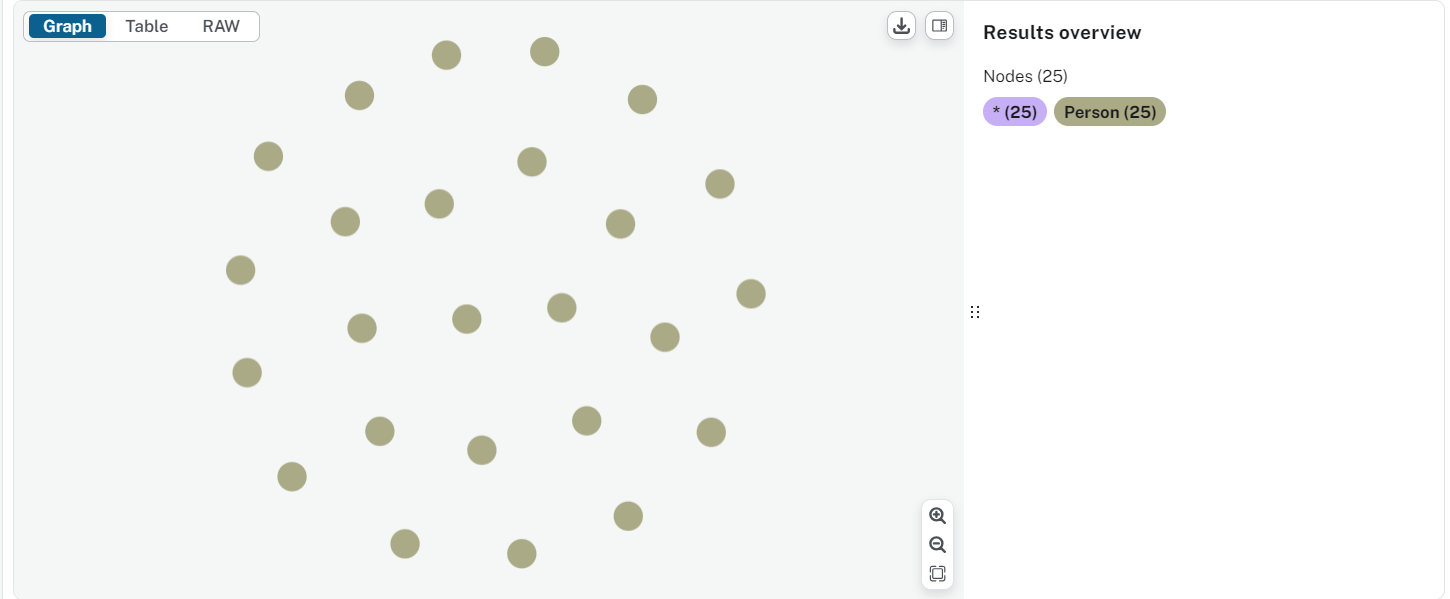

#### ACTED_IN relationship

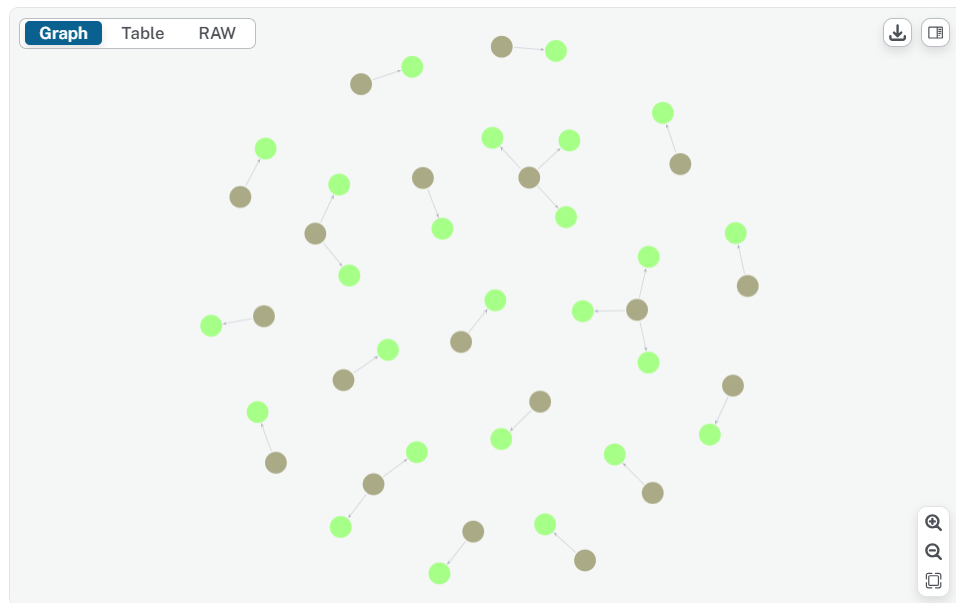

### IN_GENRE relationship

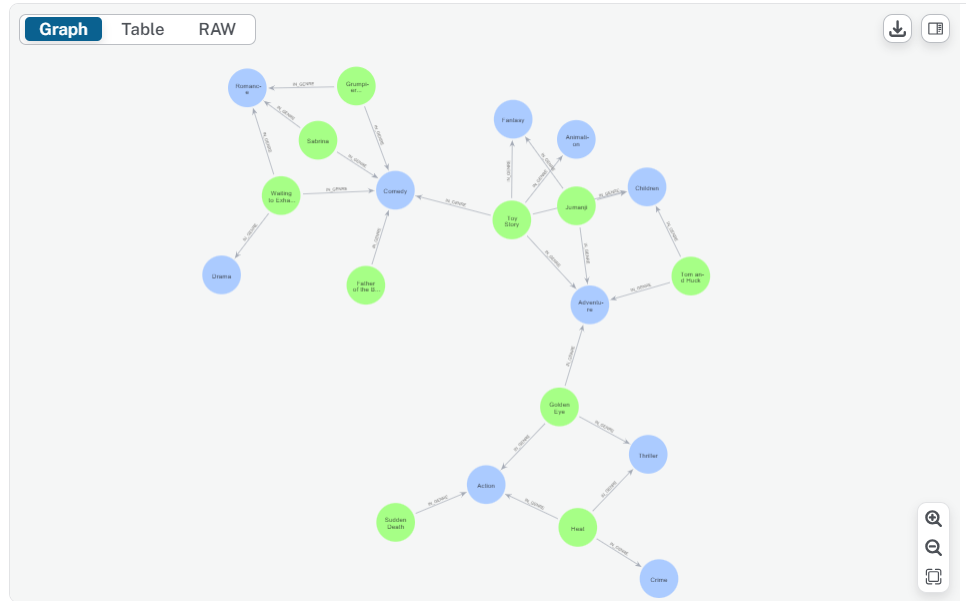

In [ ]:
graph.refresh_schema()
print(graph.schema)

Node properties:
Person {born: INTEGER, name: STRING}
Movie {title: STRING, released: INTEGER, id: STRING, imdbRating: FLOAT}
Genre {name: STRING}
Relationship properties:

The relationships:
(:Person)-[:ACTED_IN]->(:Movie)
(:Person)-[:DIRECTED]->(:Movie)
(:Movie)-[:IN_GENRE]->(:Genre)


In [ ]:
from langchain.chains import GraphCypherQAChain
chain = GraphCypherQAChain.from_llm(llm=llm, graph=graph, verbose=True, allow_dangerous_requests = True)
chain

GraphCypherQAChain(verbose=True, graph=<langchain_community.graphs.neo4j_graph.Neo4jGraph object at 0x7ccbcb7631f0>, cypher_generation_chain=LLMChain(verbose=False, prompt=PromptTemplate(input_variables=['question', 'schema'], input_types={}, partial_variables={}, template='Task:Generate Cypher statement to query a graph database.\nInstructions:\nUse only the provided relationship types and properties in the schema.\nDo not use any other relationship types or properties that are not provided.\nSchema:\n{schema}\nNote: Do not include any explanations or apologies in your responses.\nDo not respond to any questions that might ask anything else than for you to construct a Cypher statement.\nDo not include any text except the generated Cypher statement.\n\nThe question is:\n{question}'), llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ccbcc467af0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ccbcb7c8790>, model_name='Gemma2-9b-I

In [ ]:
response = chain.invoke({"query" : "Who was the director of the movie GoldenEye?"})
response

Generated Cypher:
cypher
MATCH (p:Person)-[:DIRECTED]->(m:Movie {title: "GoldenEye"})
RETURN p.name

Full Context:
[{'p.name': 'Martin Campbell'}]

> Finished chain.


{'query': 'Who was the director of the movie GoldenEye?',
 'result': 'Martin Campbell \n'}

In [ ]:
response = chain.invoke({"query" : "Who acted in the movie GoldenEye?"})
response

Generated Cypher:
MATCH (m:Movie {title: "GoldenEye"})<-[:ACTED_IN]-(p:Person) RETURN p.name 

Full Context:
[{'p.name': 'Pierce Brosnan'}, {'p.name': 'Famke Janssen'}, {'p.name': 'Sean Bean'}, {'p.name': 'Izabella Scorupco'}]

> Finished chain.


{'query': 'Who acted in the movie GoldenEye?',
 'result': 'Pierce Brosnan, Famke Janssen, Sean Bean, Izabella Scorupco  acted in the movie GoldenEye. \n'}

In [ ]:
response = chain.invoke({"query" : "Who were the actors and the directors of the movie GoldenEye?"})
response

Generated Cypher:
MATCH (m:Movie {title: "GoldenEye"})<-[:ACTED_IN|DIRECTED]-(p:Person)
RETURN p.name AS person

Full Context:
[{'person': 'Pierce Brosnan'}, {'person': 'Famke Janssen'}, {'person': 'Sean Bean'}, {'person': 'Izabella Scorupco'}, {'person': 'Martin Campbell'}]

> Finished chain.


{'query': 'Who were the actors and the directors of the movie GoldenEye?',
 'result': 'Pierce Brosnan, Famke Janssen, Sean Bean, Izabella Scorupco, and Martin Campbell.  \n'}